In [70]:
%%capture --no-stderr
%pip install -r requirements.txt

In [71]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")


_set_env("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "langchain-academy"

In [72]:
# Class Extraction Module:

from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4o", temperature=0)

def extract_classes(student_code):
    prompt = f"Extract all Java class definitions from the following code: {student_code}"
    response = model.invoke(prompt)
    classes = response['choices'][0]['message']['content']
    return classes.split('\n')  # Assuming each class starts on a new line


In [73]:
# Rubric Extraction Module:

def extract_rubric_details(rubric_text):
    prompt = f"Extract rubric details for each individual Java class from the following rubric: {rubric_text}"
    response = model.invoke(prompt)
    rubric_details = response['choices'][0]['message']['content']
    return rubric_details


In [74]:
# Initial Evaluation Module:

def initial_evaluation(class_code, rubric, model_solution):
    prompt = (f"Evaluate the following class code: {class_code} "
              f"using the rubric: {rubric} "
              f"and the model solution: {model_solution}. Provide detailed comments about the correctness, errors and suggestions the numeric score.")
    response = model.invoke(prompt)
    evaluation = response['choices'][0]['message']['content']
    return evaluation


In [75]:
# Review Evaluation Module:

def review_evaluation(initial_evaluation):
    prompt = f"Review the following evaluation, make necessary corrections, and provide final assessment for each Java class: {initial_evaluation}"
    response = model.invoke(prompt)
    final_review = response['choices'][0]['message']['content']
    return final_review


In [76]:
# Marks Extraction Module:

def extract_marks(evaluation):
    prompt = f"Extract marks for each class from the following evaluation: {evaluation}"
    response = model.invoke(prompt)
    marks_list = response['choices'][0]['message']['content'].strip()
    return [float(mark) for mark in marks_list.split(',')]


In [77]:
# Total Marks Calculation Module:

def sum_marks(marks_list):
    return sum(marks_list)


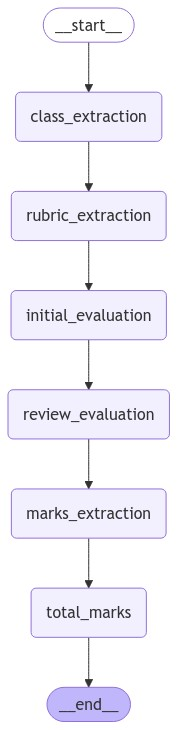

In [78]:
from langgraph.graph import StateGraph, MessagesState, START, END
from IPython.display import Image, display


# Define the functions (they must be callable)
# The extract_classes, extract_rubric_details, initial_evaluation, etc. should already be defined as callable functions



# Initialize the graph
workflow = StateGraph(MessagesState)  # Properly initialize the graph without parameters

# Add each node (state) individually to the workflow
workflow.add_node("class_extraction", extract_classes )
workflow.add_node("rubric_extraction", extract_rubric_details)
workflow.add_node("initial_evaluation", initial_evaluation)
workflow.add_node("review_evaluation", review_evaluation)
workflow.add_node("marks_extraction", extract_marks)
workflow.add_node("total_marks", sum_marks)

# Define edges (connections between states)

workflow.add_edge(START, "class_extraction")

# Connecting class_extraction_state to rubric_extraction_state
workflow.add_edge("class_extraction", "rubric_extraction")

# Connecting rubric_extraction_state to initial_evaluation_state
workflow.add_edge("rubric_extraction", "initial_evaluation")

# Connecting initial_evaluation_state to review_evaluation_state
workflow.add_edge("initial_evaluation", "review_evaluation")

# Connecting review_evaluation_state to marks_extraction_state
workflow.add_edge("review_evaluation", "marks_extraction")

# Connecting marks_extraction_state to total_marks_state
workflow.add_edge("marks_extraction", "total_marks")

workflow.add_edge("total_marks", END)

react_graph = workflow.compile()

# Show
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))



In [79]:
def read_markdown_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Read the contents of the markdown files
student_solution = read_markdown_file('data/simple-scenario/student_solution.md')
rubric = read_markdown_file('data/simple-scenario/rubric.md')
question = read_markdown_file('data/simple-scenario/question.md')  # If you want to use this somewhere
model_solution = read_markdown_file('data/simple-scenario/model_solution.md')


AttributeError: 'CompiledStateGraph' object has no attribute 'start'